# First import the necessary library

In [1]:
from onset_functions import *
import onset_widgets as w

# Choose the spacecraft, sensor, view direction and particle species:

In [2]:
display(w.spacecraft_drop, w.sensor_drop, w.view_drop, w.species_drop)

Dropdown(description='Spacecraft:', options=('STEREO-A', 'STEREO-B', 'Solar Orbiter', 'SOHO'), value='STEREO-A…

Dropdown(description='Sensor:', options=('SEPT', 'HET'), value='SEPT')

Dropdown(description='Viewing:', options=('sun', 'asun', 'north', 'south'), value='sun')

Dropdown(description='Species:', options=('ions', 'electrons'), value='ions')

# Set the path to your data folder:

In [15]:
# Path for the downloaded data (by default the current directory)
data_path = f"{os.getcwd()}"

# Choose time range for data loading, and create the Event object:

In [16]:
# Format of date: year, month, day
startdate = datetime.date(2021, 10, 9)
enddate = datetime.date(2021, 10, 10)

# Get event data:
Event_onset = Event(spacecraft=w.spacecraft_drop.value, sensor=w.sensor_drop.value, 
                    data_level='l2', species = w.species_drop.value,
                    start_date=startdate, end_date=enddate, 
                    data_path=data_path)

# Print out the energy channel keys and corresponding energy ranges

In [17]:
Event_onset.print_energies()

soho, ephin:

E150: 0.25 - 0.7 MeV
E300: deactivated bc. of failure mode D
E1300: 0.67 - 10.4 MeV
E3000: 4.80 - 10.4 MeV


IndexError: index 4 is out of bounds for axis 0 with size 4

# Set the averaging period, background_range, channels to plot and the time range of the plot:

In [21]:
# Use pandas-compatible resampling period string, e.g. '10min' or '30s'
# Leave to None to not resample data
averaging = "2min"

# Set the time range for what is considered the background preceding the event:
# Format of datetime: year, month, day, hour, minute, second
background_range = (datetime.datetime(2021, 10, 9, 2, 0, 0), 
                    datetime.datetime(2021, 10, 9, 6, 0, 0))

# Set the channel(s) to plot (use a list to combine multiple channels):
channels = 150

# Set the time range for the plot:
plot_range = [datetime.datetime(2021, 10, 9, 0),datetime.datetime(2021, 10, 9, 12)]

# Run the cell to produce a plot

##### >Energy channels< #####
0.25 - 0.7 MeV
#############################

##### >Flux peak< #####
time
2021-10-09 10:17:00    27.6515
Freq: 2T, Name: E150, dtype: float64
#######################

##### >Onset time< #####
2021-10-09 07:53:00
########################

##### >Mean of background intensity< #####
0.5814703125
##########################################

##### >Std of background intensity< #####
0.2588688343783437
#########################################

##### >Particle species< #####
electrons
##############################



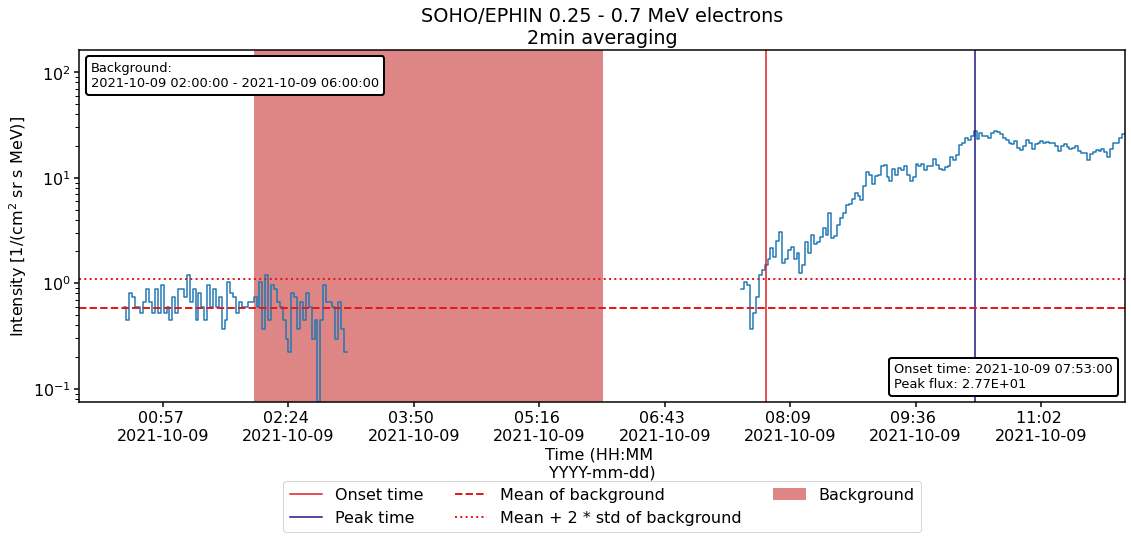

In [22]:
flux, onset_stats, onset_found, peak_flux, peak_time, fig, bg_mean = Event_onset.analyse(viewing=w.view_drop.value, background_range=background_range, channels=channels,
                                                                                         resample_period=averaging, yscale='log', cusum_window=30, xlim=plot_range)
onset = onset_stats[-1]
peak_flux = peak_flux.values[0]
output = Event_onset.output

# output is a dictionary, that contains 'flux_series', 'onset_stats', 'onset_found', 'onset', 'peak_flux', 'peak_time', 'fig' and 'bg_mean'

In [10]:
print(f"Onset: {output['onset']}")
print(f"Peak flux: {output['peak_flux']:.2e}")
print(f"Peak time: {output['peak_time']:}")
print(f"Bg mean: {output['bg_mean']:.2e}")

Onset: 2021-10-09 06:50:58.041590528
Peak flux: 1.30e+05
Peak time: 2021-10-09 07:47:58.012780800
Bg mean: 2.45e+01


# Saving figures

In [20]:
# Path to save the plots
plot_path = f'{os.getcwd()}'

# Use a pre-generated name for the file:
file_name = f"{plot_path}{os.sep}{w.spacecraft_drop.value.replace(' ', '_')}_{w.sensor_drop.value}_{w.species_drop.value}_{startdate.strftime('%Y%m%d')}_av_{averaging}.png"

# Or type your own here:
# file_name = ""

In [21]:
# Check that the name is correct
print(file_name)

/home/chospa/Documents/Github/SPOT/STEREO-A_SEPT_electrons_20210720_None.png


In [23]:
# Save plot
fig.savefig(file_name, facecolor= 'white', transparent=False)